In [1]:
import os
import torch
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from helper_functions import load_embeddings
from config import BASE_FOLDER, NEW_DIRECTORY
from embeddings import get_embedding
import matplotlib.pyplot as plt
from PIL import Image
import random

In [2]:
embeddings, labels = load_embeddings(NEW_DIRECTORY)

In [3]:
print(embeddings.shape)

(6094, 512)


In [4]:
print(labels.shape)

(6094,)


In [5]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(embeddings, labels)

KNeighborsClassifier(n_neighbors=2)

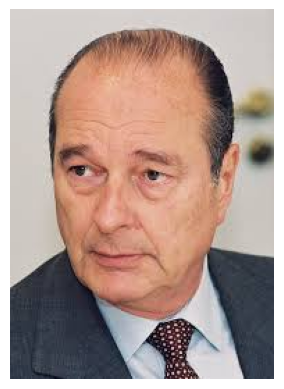

In [6]:
test_image = 'jaques.jpeg'
test_image = 'Test_Images/' + test_image
test_image_display = Image.open(test_image)
plt.imshow(test_image_display)
plt.axis('off')
plt.show()

In [7]:
emb = get_embedding(test_image)
prediction = model.predict(emb)
prediction = prediction[0]
prediction

'654'

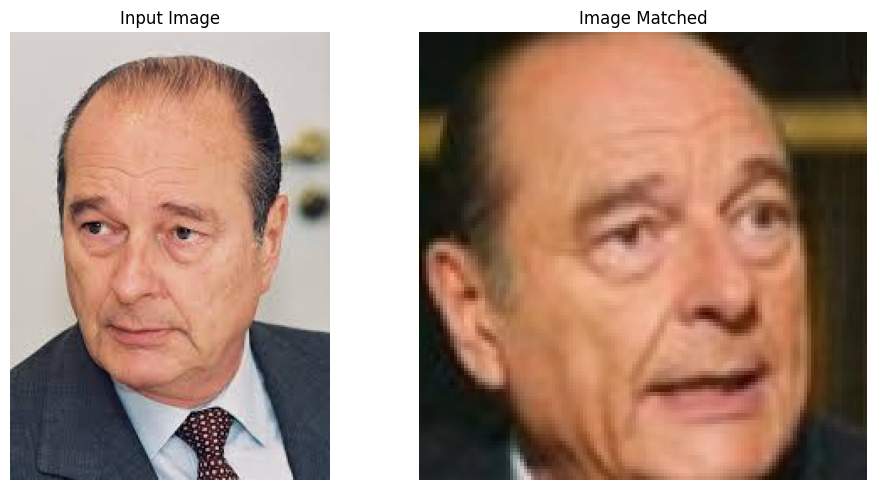

In [9]:
plt.figure(figsize=(10, 5))

# Display the test image
plt.subplot(1, 2, 1)
test_image_display = Image.open(test_image)
plt.imshow(test_image_display)
plt.title('Input Image')
plt.axis('off')

# Display a random image from the predicted person's folder
predicted_image_folder = os.path.join(BASE_FOLDER, prediction)
predicted_image_files = os.listdir(predicted_image_folder)
random_image_file = random.choice(predicted_image_files)
random_image_path = os.path.join(predicted_image_folder, random_image_file)
predicted_image = Image.open(random_image_path)

plt.subplot(1, 2, 2)
plt.imshow(predicted_image)
plt.title('Image Matched')
plt.axis('off')

plt.tight_layout()
plt.show()